In [ ]:
!pip install --upgrade scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


<ipython-input-1-7a6b4f40a1d1>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Check out the Data**

In [ ]:
df = pd.read_csv('/content/news_data.csv')
df.head()

,Unnamed: 0,category,links,news
0,0,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form..."
1,1,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form..."
2,2,political,https://en.setopati.com/political/161368,\nThe Supreme Court did not hear the petition ...
3,3,political,https://en.setopati.com/political/161365,\nThe voice in an audio recording linking Nepa...
4,4,political,https://en.setopati.com/political/161364,\nThe three major parties have agreed to end t...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  291 non-null    int64 
 1   category    291 non-null    object
 2   links       291 non-null    object
 3   news        291 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.2+ KB


# **Exploratory Data Analysis**

In [ ]:
df.groupby('category').count()

,Unnamed: 0,links,news
category,,,
International,42,42,42
blog,42,42,42
entertainment,38,38,38
market,1,1,1
political,42,42,42
social,42,42,42
sports,42,42,42
view,42,42,42


Let's make a new column to detect how long the text messages are

In [ ]:
df['Length'] = df['news'].apply(len)
df.head()

,Unnamed: 0,category,links,news,Length
0,0,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form...",3129
1,1,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form...",3129
2,2,political,https://en.setopati.com/political/161368,\nThe Supreme Court did not hear the petition ...,969
3,3,political,https://en.setopati.com/political/161365,\nThe voice in an audio recording linking Nepa...,1886
4,4,political,https://en.setopati.com/political/161364,\nThe three major parties have agreed to end t...,963


Let's see the percentage of ham and spam in our dataset

In [ ]:
df['Length'].describe()

count      291.000000
mean      3864.498282
std       3017.724321
min        428.000000
25%       1163.000000
50%       3117.000000
75%       5948.500000
max      13464.000000
Name: Length, dtype: float64

One of the text has 910 characters, let's use masking to find this message:

# **Text Cleaning**

Let’s clean the text for the messages in our dataset with NLP.

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
mess = ['''For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..''']

In [ ]:
nopunc = [char for char in mess if char not in string.punctuation]
print(nopunc)

["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's create the function to remove all punctuation, remove all stopwords and returns a list of the cleaned text

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**Vectorization**

Now we have the messages as lists and we need to convert each of those messages into a vector that SciKit Learn's algorithm models can work with.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['news'])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f43f62c0ca0>)

In [ ]:
bow_transformer.vocabulary_

{'proposal': 13652,
 'Bam': 951,
 'Dev': 1666,
 'Gautam': 2094,
 'formed': 9702,
 'CPN': 1246,
 'Unity': 4977,
 'National': 3446,
 'Campaign': 1265,
 'rejoin': 14145,
 'CPNUML': 1248,
 'got': 9996,
 'stuck': 15762,
 'seems': 14856,
 'enthusiastic': 8948,
 'main': 11678,
 'opposition': 12667,
 'party': 12919,
 'removed': 14236,
 'age': 5519,
 'limit': 11493,
 '70': 479,
 'years': 17470,
 'executive': 9153,
 'committees': 7191,
 'reached': 13922,
 'UML': 4930,
 'office': 12567,
 'Chyasal': 1403,
 'met': 11941,
 'Chairman': 1321,
 'KP': 2687,
 'Sharma': 4388,
 'Oli': 3588,
 'June': 2672,
 '18': 124,
 'expressed': 9248,
 'wish': 17335,
 'claimed': 6987,
 'help': 10310,
 'expand': 9184,
 'membership': 11893,
 'six': 15194,
 'million': 12004,
 'also': 5628,
 'briefed': 6514,
 'preliminary': 13417,
 'concept': 7305,
 'achieving': 5356,
 'socialism': 15303,
 'Nepali': 3478,
 'characteristics': 6865,
 'meeting': 11880,
 'lukewarm': 11647,
 '“I': 17657,
 'gone': 9989,
 'unification': 16726,
 'co

Print total number of vocab words

In [ ]:
print(len(bow_transformer.vocabulary_))

18021


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

In [ ]:
message4 = df['news'][3]
print(message4)


The voice in an audio recording linking Nepali Congress lawmaker Arzu Rana Deuba with the fake Bhutanese refugees scam has been found to match that of Sandesh Sharma.
The 34-year-old Sharma, who hails from Tulsipur Sub-metropolitan City-16, Dang, is currently in custody. The District Police Range, Teku, is investigating him on charges of fraud and organized crime.
Rana had filed a complaint with the Cyber Bureau of Nepal Police demanding an investigation into the audio recording, which she claimed to be fake.
In a letter to the applicant made public on Sunday, Deputy Inspector General Kuber Kadayat at the Nepal Police Headquarters has stated that the voice in the audio recording matched Sharma’s.
Kadayat has said in the letter that they had written to TikTok Singapore for information on where and from whom the audio had originated but that they had yet to receive further details.
Kadayat told Setopati that they wrote to Rana as she had submitted an application inquiring about the prog

Now let's see its vector representation

Now let's transform the entire DataFrame of messages and create sparse matrix

In [ ]:
messages_bow = bow_transformer.transform(df['news'])
messages_bow

<291x18021 sparse matrix of type '<class 'numpy.int64'>'
	with 70883 stored elements in Compressed Sparse Row format>

In [ ]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (291, 18021)
Amount of Non-Zero occurences:  70883


# **TF-IDF**

Now let's compute term weighting and do normalisation with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(messages_bow)
print(tfidf4)

  (0, 17691)	0.04729717133222614
  (0, 17657)	0.05691321575116587
  (0, 17643)	0.04729717133222614
  (0, 17598)	0.079622085943997
  (0, 17470)	0.04151998008883226
  (0, 17424)	0.07158738003745993
  (0, 17393)	0.02533147253364524
  (0, 17388)	0.026023347821980205
  (0, 17335)	0.0398110429719985
  (0, 17192)	0.04337140368952424
  (0, 17111)	0.04729717133222614
  (0, 16994)	0.04729717133222614
  (0, 16894)	0.044511794862506955
  (0, 16804)	0.04337140368952424
  (0, 16740)	0.14189151399667843
  (0, 16730)	0.04729717133222614
  (0, 16726)	0.13353538458752087
  (0, 16597)	0.036136773477931775
  (0, 16393)	0.025845688996560784
  (0, 16333)	0.0513424628117275
  (0, 16284)	0.09160932748625393
  (0, 16256)	0.02197877949456674
  (0, 16212)	0.03050253090555198
  (0, 16196)	0.038425521381178815
  (0, 16040)	0.07685104276235763
  :	:
  (290, 1076)	0.08787737849826201
  (290, 949)	0.32992759669056876
  (290, 874)	0.03528498553089925
  (290, 863)	0.04713251381293839
  (290, 862)	0.04713251381293839
  

In [ ]:
# from sklearn.svm import SVC
# from datetime import datetime
# start_time = datetime.now()

# model = SVC()
# model.fit(x_train,y_train)

# end_time = datetime.now()
# process_time = round(end_time-start_time,2)
# print("Fitting SVC took {} seconds".format(process_time))

In the above evaluation, we evaluated accuracy on the same data we used for training. You should never actually evaluate on the same dataset you train on! the proper way is to split the data into a training set and test set,

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['news'], df['category'], test_size=0.2,shuffle=True)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

232 59 291


In [ ]:
label_test

5          political
41         political
178             view
69            social
217             blog
207             blog
278    International
246             blog
265    International
234             blog
136           sports
219             blog
191             view
286    International
26         political
282    International
256    International
226             blog
185             view
270    International
252    International
14         political
35         political
122    entertainment
131           sports
125           sports
243             blog
38         political
132           sports
153           sports
171             view
157           sports
53            social
277    International
50            social
83            social
89     entertainment
31         political
120    entertainment
225             blog
88     entertainment
85     entertainment
231             blog
90     entertainment
15         political
75            social
71            social
145          

**Creating a Data Pipeline**

Let's run our model again and then predict the test set. We will create and use a pipeline for this purpose

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
])

In [ ]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f43f62c0ca0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
set(label_test)

{'International',
 'blog',
 'entertainment',
 'political',
 'social',
 'sports',
 'view'}

In [ ]:
predictions = pipeline.predict(msg_test)
predictions

array(['political', 'social', 'view', 'social', 'blog', 'blog',
       'International', 'blog', 'blog', 'blog', 'sports', 'blog', 'view',
       'entertainment', 'social', 'entertainment', 'International',
       'blog', 'blog', 'International', 'International', 'entertainment',
       'entertainment', 'entertainment', 'sports', 'sports', 'blog',
       'entertainment', 'sports', 'sports', 'view', 'entertainment',
       'social', 'International', 'social', 'social', 'entertainment',
       'blog', 'entertainment', 'blog', 'entertainment', 'entertainment',
       'blog', 'entertainment', 'view', 'social', 'social', 'sports',
       'social', 'view', 'entertainment', 'political', 'International',
       'view', 'entertainment', 'political', 'blog', 'political', 'view'],
      dtype=object)

In [ ]:
class_names = np.array(['International',
'blog',
'entertainment',
'political',
'social',
'sports',
'view'])

# **Making Confusion Matrix**

Confusion Matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(label_test,predictions)
print(cm)

[[ 6  1  2  0  0  0  0]
 [ 0 10  0  0  0  0  1]
 [ 0  0  7  0  0  0  0]
 [ 0  1  3  4  2  0  1]
 [ 0  0  1  0  7  0  0]
 [ 0  0  1  0  0  6  0]
 [ 0  1  0  0  0  0  5]]


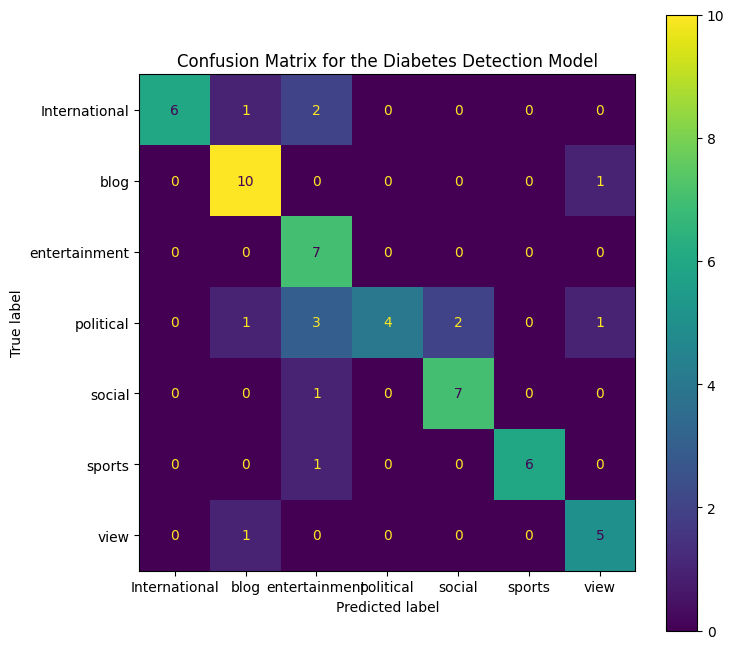

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [ ]:
print(classification_report(predictions,label_test))

               precision    recall  f1-score   support

International       0.67      1.00      0.80         6
         blog       0.91      0.77      0.83        13
entertainment       1.00      0.50      0.67        14
    political       0.36      1.00      0.53         4
       social       0.88      0.78      0.82         9
       sports       0.86      1.00      0.92         6
         view       0.83      0.71      0.77         7

     accuracy                           0.76        59
    macro avg       0.79      0.82      0.76        59
 weighted avg       0.85      0.76      0.77        59



In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predictions,label_test))

Accuracy: 0.7627118644067796


In [ ]:
msg_test

5      \nChief Minister of Koshi province Uddhav Thap...
41     \nThe Supreme Court has issued an interim orde...
178    \nThe Kathmandu Metropolitan City (KMC) has be...
69     \nFive people died and 12 others were injured ...
217    \nIn a very odd manner, every possible world t...
207    \nThe Nepal Academy has recently published pho...
278    \nUS President Joe Biden on Thursday pronounce...
246    \nLesson 1\nWe often share jokes about “wives”...
265    \nScientists have created embryo models to hel...
234    \nThere was a time when I regularly visited co...
136    \nFinally, there are signs of life at Manchest...
219    \nRabindra Mishra’s new alliance with the Rash...
191    \nIndustry Minister Gajendra Hamal has resigne...
286    \nGlaciers are melting at unprecedented rates ...
26     \nThe former federal lawmaker from Parsa-3 and...
282    \nFor the first time, U.S. regulators on Wedne...
256    \nAirstrikes targeting Palestinian militants i...
226    \nThe Nepal Academy has 